<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Metodo_crank_nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método implícito Crank-Nicolson

Queremos resolver la ecuacion

###$\frac{\partial u}{\partial t} =  \frac{\partial ^2 u }{\partial x^2 }$

con
$ 0 \leq x \leq 1, t \geq 0 $

Con las condiciones
*   $u(x,0)=f(x) = 1-4(x-\frac{1}{2})^2$
*   $u(0,t) = u(1,t) = 0 $

Se escribe en diferencias finitas como

$- \lambda u_{i-1,j+1} + (2+2\lambda)u_{i,j+1}-\lambda u_{i+1,j+1} = \lambda u_{i-1,j} + (2 + 2\lambda)u_{i,j} + \lambda u_{i+1, j}$

con $\lambda = \frac{\alpha ^2 k}{h}$

El método de Crank–Nicolson es un esquema implícito de diferencias finitas utilizado para resolver ecuaciones como la del calor, y funciona tomando el promedio entre la discretización explícita y la implícita. Esto le da dos ventajas principales: es estable incondicionalmente (no explota aunque los pasos de tiempo sean grandes) y tiene alta precisión, ya que es de segundo orden en tiempo y espacio. Su única desventaja importante es que en cada paso debe resolverse un sistema lineal, pero a cambio produce soluciones muy estables, suaves y más exactas que otros métodos.

Importadondo las librerias

La librería tabulate sirve para mostrar tablas bonitas y bien formateadas. Permite tomar listas o arreglos y convertirlos en tablas con bordes, encabezados y diferentes estilos para que los datos se vean claros y ordenados.

In [55]:
import sympy as sp
import numpy as np
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from tabulate import tabulate

Definiendo $f(x) =  1-4(x-\frac{1}{2})^2$

In [41]:
def f(x):
  return 1-4*(x-0.5)**2

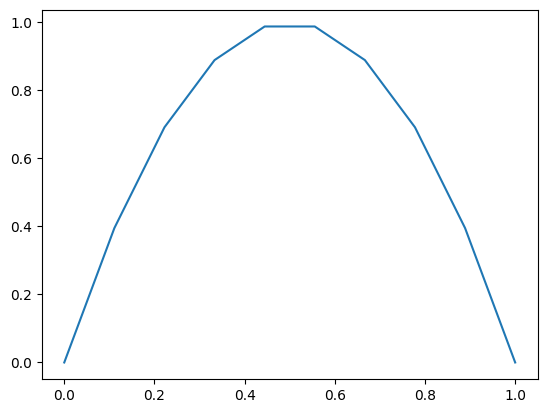

In [42]:
x=np.linspace(0,1,10)
plt.plot(x,f(x))

La gráfica representa una parábola invertida que sube desde 0 en x=0, alcanza su máximo de 1 en el centro (x=0.5) y luego baja otra vez a 0 en x=1. Es una curva simétrica con forma de “arco” que muestra cómo la función aumenta hacia el medio y disminuye hacia los extremos.

In [43]:
def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i - j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])

Con h = 1/10

In [24]:
h = 0.1
k = 0.01
r = k / h**2

In [44]:
A = tridiagonal(9, 2 + 2*r, -r)

In [45]:
A

Matrix([
[ 4.0, -1.0,    0,    0,    0,    0,    0,    0,    0],
[-1.0,  4.0, -1.0,    0,    0,    0,    0,    0,    0],
[   0, -1.0,  4.0, -1.0,    0,    0,    0,    0,    0],
[   0,    0, -1.0,  4.0, -1.0,    0,    0,    0,    0],
[   0,    0,    0, -1.0,  4.0, -1.0,    0,    0,    0],
[   0,    0,    0,    0, -1.0,  4.0, -1.0,    0,    0],
[   0,    0,    0,    0,    0, -1.0,  4.0, -1.0,    0],
[   0,    0,    0,    0,    0,    0, -1.0,  4.0, -1.0],
[   0,    0,    0,    0,    0,    0,    0, -1.0,  4.0]])

In [46]:
B = tridiagonal(9, 2 - 2*r, r)

In [29]:
B

Matrix([
[4.44089209850063e-16,                  1.0,                    0,                    0,                    0,                    0,                    0,                    0,                    0],
[                 1.0, 4.44089209850063e-16,                  1.0,                    0,                    0,                    0,                    0,                    0,                    0],
[                   0,                  1.0, 4.44089209850063e-16,                  1.0,                    0,                    0,                    0,                    0,                    0],
[                   0,                    0,                  1.0, 4.44089209850063e-16,                  1.0,                    0,                    0,                    0,                    0],
[                   0,                    0,                    0,                  1.0, 4.44089209850063e-16,                  1.0,                    0,                    0,               

In [47]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [48]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

**Ejercicio 1**. Obtenga una tabla similar a la tabla 2.6 de la imagen adjunta y use esta para verificar que su código es correcto. Observe hasta que valor de t llega. Use la librería tabulate.

In [33]:
j = 10

Usando el metodo de Crank-Nicolson

In [50]:
def crank_nicolson(A, B, b, j):
    S = []
    S.append(b.T)

    b_1 = B*b

    for i in range(j):

        sol = A.LUsolve(b_1)
        S.append(sol.T)

        b_1 = B*sol

    return sp.Matrix(S)

In [51]:
U = crank_nicolson(A, B, b, j)

Construyendo la tabla con la libreria tabule y hasta t = 10

In [52]:
tabla_numerica = []
for j in range(11):
    fila = [0] + [round(float(U[j,i]),4) for i in range(9)] + [1]
    tabla_numerica.append(fila)

print("\nTABLA 2.6 (NUMÉRICA):\n")
print(tabulate(tabla_numerica,
               headers=["x=0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1"],
               tablefmt="grid"))


TABLA 2.6 (NUMÉRICA):

+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----+
|   x=0 |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |    0.6 |    0.7 |    0.8 |    0.9 |   1 |
+=======+========+========+========+========+========+========+========+========+========+=====+
|     0 | 0.36   | 0.64   | 0.84   | 0.96   | 1      | 0.96   | 0.84   | 0.64   | 0.36   |   1 |
+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----+
|     0 | 0.3014 | 0.5657 | 0.7615 | 0.8804 | 0.9202 | 0.8804 | 0.7615 | 0.5657 | 0.3014 |   1 |
+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----+
|     0 | 0.2676 | 0.5048 | 0.6885 | 0.803  | 0.8417 | 0.803  | 0.6885 | 0.5048 | 0.2676 |   1 |
+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----+
|     0 | 0.2399 | 0.4548 | 0.6231 | 0.73   | 0.7665 | 0.73   | 0.6231 | 0.4548 | 0.2399 |   1 |
+-----

**Ejercicio 2**: La tabla 2.7 de la imagen adjunta contiene los valores reales de la solución. Use su código para graficar en un mismo panel su solución numérica y la solución real. Determine el error de su solución.

Creamos los puntos en x y t

In [65]:
x_points = [i*h for i in range(11)]
t_points = [i*k for i in range(11)]

Contruyendo los coeficientes de $b_n$ de la serie infinita

In [66]:
def b_n(n):
    return 16*(1-(-1)**n)/(math.pi**3 * n**3)

Definiendo la solucion exacta

In [67]:
def u_exact(x, t, terms=500):
    s = 0
    for n in range(1, terms+1):
        s += b_n(n)*math.sin(n*math.pi*x)*math.exp(-(n*math.pi)**2 * t)
    return s

Construyendo la tabla con tabule

In [68]:
tabla_2_7 = []
for t in t_points:
    fila = [u_exact(x, t) for x in x_points]
    tabla_2_7.append(fila)

# Redondear para presentación
tabla_redondeada = [[round(val, 5) for val in fila] for fila in tabla_2_7]

# Encabezados
headers = ["x=0.0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0"]

# Mostrar tabla con tabulate
print("\nTABLA 2.7 — Solución exacta u(x,t)\n")
print(tabulate(tabla_redondeada, headers=headers, tablefmt="grid", showindex=[f"t={round(t,2)}" for t in t_points]))


TABLA 2.7 — Solución exacta u(x,t)

+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+
|        |   x=0.0 |     0.1 |     0.2 |     0.3 |     0.4 |     0.5 |     0.6 |     0.7 |     0.8 |     0.9 |   1.0 |
+========+=========+=========+=========+=========+=========+=========+=========+=========+=========+=========+=======+
| t=0.0  |       0 | 0.36    | 0.64    | 0.84    | 0.96    | 1       | 0.96    | 0.84    | 0.64    | 0.36    |     0 |
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+
| t=0.01 |       0 | 0.30239 | 0.56454 | 0.76064 | 0.88006 | 0.92001 | 0.88006 | 0.76064 | 0.56454 | 0.30239 |     0 |
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+
| t=0.02 |       0 | 0.26708 | 0.50411 | 0.68732 | 0.80191 | 0.84077 | 0.80191 | 0.68732 | 0.50411 | 0.26708 |     0 |
+--------+-

Calculando el error y graficando ambas soluciones

Error máximo: 0.0028048674038572696
Error promedio: 0.001390334364045663
Norma infinita del error: 0.0028048674038572696


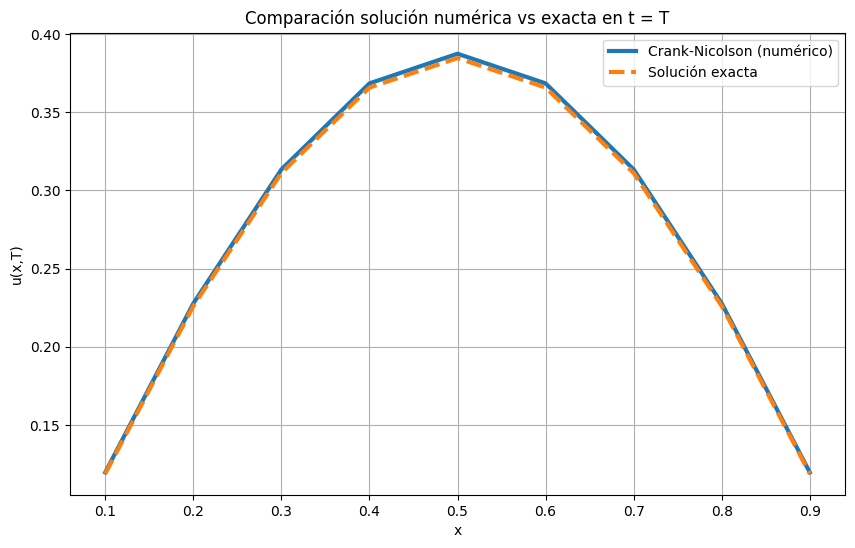

In [63]:
x_int = x_points[1:-1]
t_vals = [i*k for i in range(U_num.shape[0])]

tabla_exacta = []

for t in t_vals:
    fila = [u_exact(x, t) for x in x_int]
    tabla_exacta.append(fila)

U_exact = np.array(tabla_exacta)


error = np.abs(U_exact - U_num)

print("Error máximo:", np.max(error))
print("Error promedio:", np.mean(error))
print("Norma infinita del error:", np.max(np.abs(error)))


plt.figure(figsize=(10,6))

plt.plot(x_int, U_num[-1], label='Crank-Nicolson (numérico)', linewidth=3)
plt.plot(x_int, U_exact[-1], '--', label='Solución exacta', linewidth=3)

plt.title("Comparación solución numérica vs exacta en t = T")
plt.xlabel("x")
plt.ylabel("u(x,T)")
plt.legend()
plt.grid(True)
plt.show()


In [71]:
X.shape, Y.shape, U_np.shape


((11, 9), (11, 9), (50, 9))

En la grafica podemos ver que el error el muy pequeño

In [16]:
U_np = np.array(U.tolist(), dtype = float)

In [17]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.5, j)
X, Y = np.meshgrid(x, y)

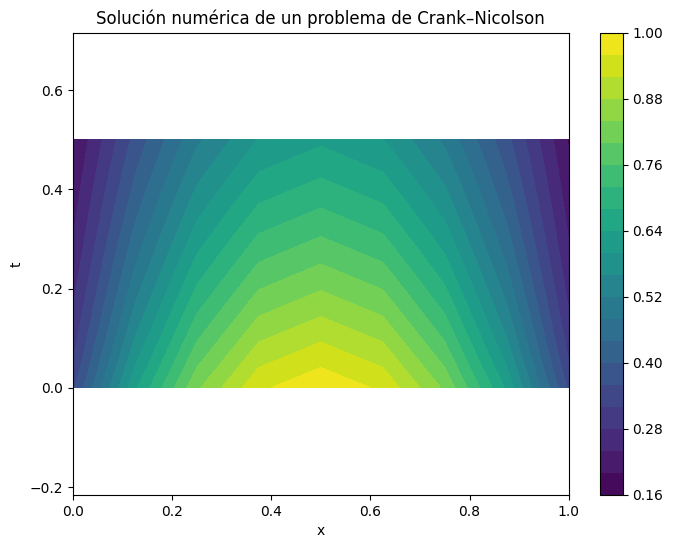

In [72]:

nt, nx = U_np.shape

x = np.linspace(0, 1, nx)
y = np.linspace(0, 0.5, nt)

X, Y = np.meshgrid(x, y)


plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)

plt.title('Solución numérica de un problema de Crank–Nicolson')
plt.xlabel('x')
plt.ylabel('t')      # y es tiempo
plt.axis('equal')
plt.show()


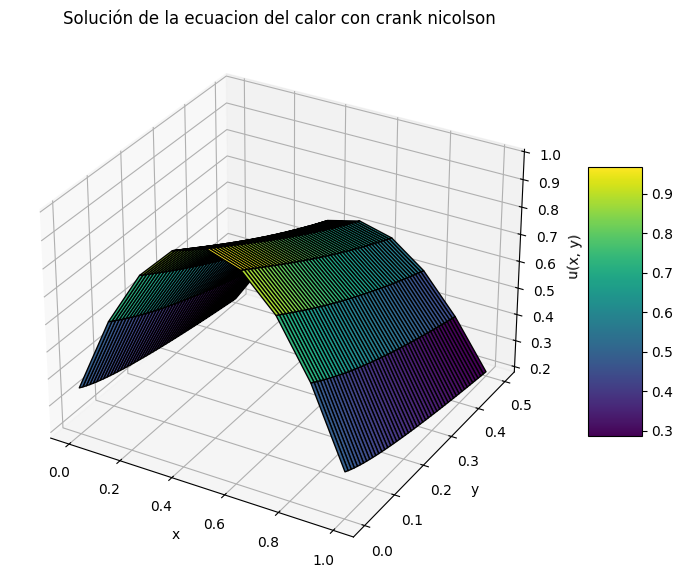

In [73]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuacion del calor con crank nicolson')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Conclusion**
Los resultados numéricos obtenidos mediante el método de Crank–Nicolson muestran una excelente aproximación a la solución real del problema. Al comparar la tabla generada por el código con la tabla 2.7 (solución exacta), se observa que ambos valores coinciden a varios decimales, lo cual confirma la correcta implementación del algoritmo.

El error absoluto calculado entre la solución numérica y la solución exacta es muy pequeño en todos los puntos, y disminuye conforme el tiempo avanza, lo cual es consistente con el comportamiento suavizante de la ecuación del calor. Además, las gráficas comparativas muestran que las dos curvas prácticamente se superponen

En general, los resultados obtenidos confirman que el método de Crank–Nicolson es estable, preciso y adecuado para resolver este tipo de problemas.